In [0]:
ntj = spark.read.json('s3://sparta-data/NintendoTweets.json').rdd
ntj
# really big bunch of data: NEVER RUN collect() ON THIS!

Out[1]: MapPartitionsRDD[354] at javaToPython at NativeMethodAccessorImpl.java:0

In [0]:
ntj.count()

Out[2]: 104695

In [0]:
ntj.first()

Out[3]: Row(contributors=None, coordinates=None, created_at='Tue Jun 12 16:00:24 +0000 2018', display_text_range=None, entities=Row(hashtags=[Row(indices=[12, 27], text='NintendoDirect')], media=None, symbols=[], urls=[], user_mentions=[]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=1006566899541598210, id_str='1006566899541598210', in_reply_to_screen_name=None, in_reply_to_status_id=None, in_reply_to_status_id_str=None, in_reply_to_user_id=None, in_reply_to_user_id_str=None, is_quote_status=False, lang='en', limit=None, place=None, possibly_sensitive=None, quote_count=0, quoted_status=None, quoted_status_id=None, quoted_status_id_str=None, quoted_status_permalink=None, reply_count=0, retweet_count=0, retweeted=False, retweeted_status=None, source='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', text='IT BEGINS!! #NintendoDirect', timestamp_ms='1528819224616', truncated=False, user=Row(contributors_enabled=False, created_at='Sat Oct 01 19:27:29 +0000 2016', default_profile=False, default_profile_image=False, description='artist-shitposter • video game-animation/anime addict • bad at rhyming', favourites_count=63943, follow_request_sent=None, followers_count=494, following=None, friends_count=1229, geo_enabled=True, id=782300925155237889, id_str='782300925155237889', is_translator=False, lang='en', listed_count=4, location='[Discord: Nicholas C.#3576]', name='Nicholas C.3!!! - SMASH BROS MANIA🏳️\u200d🌈', notifications=None, profile_background_color='000000', profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png', profile_background_image_url_https='https://abs.twimg.com/images/themes/theme1/bg.png', profile_background_tile=False, profile_banner_url='https://pbs.twimg.com/profile_banners/782300925155237889/1528814363', profile_image_url='http://pbs.twimg.com/profile_images/1006299837019639809/mnsQF07e_normal.jpg', profile_image_url_https='https://pbs.twimg.com/profile_images/1006299837019639809/mnsQF07e_normal.jpg', profile_link_color='AC4185', profile_sidebar_border_color='000000', profile_sidebar_fill_color='000000', profile_text_color='000000', profile_use_background_image=False, protected=False, screen_name='nickisonlinet', statuses_count=25798, time_zone=None, translator_type='none', url='https://listography.com/nickisonlinet', utc_offset=None, verified=False))

In [0]:
print(ntj.first().user.screen_name)
print(ntj.first().text)

nickisonlinet
IT BEGINS!! #NintendoDirect

In [0]:
ntj.first().asDict()
# creates a dictionary - much easier to read!
#ntj.first().user.asDict()
# look at data specific to 'user'

Out[24]: {'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Jun 12 16:00:24 +0000 2018',
 'display_text_range': None,
 'entities': Row(hashtags=[Row(indices=[12, 27], text='NintendoDirect')], media=None, symbols=[], urls=[], user_mentions=[]),
 'extended_entities': None,
 'extended_tweet': None,
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 1006566899541598210,
 'id_str': '1006566899541598210',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'limit': None,
 'place': None,
 'possibly_sensitive': None,
 'quote_count': 0,
 'quoted_status': None,
 'quoted_status_id': None,
 'quoted_status_id_str': None,
 'quoted_status_permalink': None,
 'reply_count': 0,
 'retweet_count': 0,
 'retweeted': False,
 'retweeted_status': None,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': 'IT BEGINS!! #NintendoDirect',
 'timestamp_ms': '1528819224616',
 'truncated': False,
 'user': Row(contributors_enabled=False, created_at='Sat Oct 01 19:27:29 +0000 2016', default_profile=False, default_profile_image=False, description='artist-shitposter • video game-animation/anime addict • bad at rhyming', favourites_count=63943, follow_request_sent=None, followers_count=494, following=None, friends_count=1229, geo_enabled=True, id=782300925155237889, id_str='782300925155237889', is_translator=False, lang='en', listed_count=4, location='[Discord: Nicholas C.#3576]', name='Nicholas C.3!!! - SMASH BROS MANIA🏳️\u200d🌈', notifications=None, profile_background_color='000000', profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png', profile_background_image_url_https='https://abs.twimg.com/images/themes/theme1/bg.png', profile_background_tile=False, profile_banner_url='https://pbs.twimg.com/profile_banners/782300925155237889/1528814363', profile_image_url='http://pbs.twimg.com/profile_images/1006299837019639809/mnsQF07e_normal.jpg', profile_image_url_https='https://pbs.twimg.com/profile_images/1006299837019639809/mnsQF07e_normal.jpg', profile_link_color='AC4185', profile_sidebar_border_color='000000', profile_sidebar_fill_color='000000', profile_text_color='000000', profile_use_background_image=False, protected=False, screen_name='nickisonlinet', statuses_count=25798, time_zone=None, translator_type='none', url='https://listography.com/nickisonlinet', utc_offset=None, verified=False)}

In [0]:
most_follows = ntj.sortBy(lambda x: x.user.followers_count, False).first()
# 'False' is to sort descending
# returns error: somewhere in ntj, a row is devoid of user!

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-409145448889483> in <module> 
 ----> 1 most_follows = ntj . sortBy ( lambda x : x . user . followers_count , False ) . first ( ) 

 /databricks/spark/python/pyspark/rdd.py in sortBy (self, keyfunc, ascending, numPartitions) 
 814 [ ( 'a' , 1 ) , ( 'b' , 2 ) , ( '1' , 3 ) , ( 'd' , 4 ) , ( '2' , 5 ) ] 
 815 """
 --> 816 return self . keyBy ( keyfunc ) . sortByKey ( ascending , numPartitions ) . values ( ) 
 817 
 818 def glom ( self ) : 

 /databricks/spark/python/pyspark/rdd.py in sortByKey (self, ascending, numPartitions, keyfunc) 
 780 # the key-space into bins such that the bins have roughly the same 
 781 # number of (key, value) pairs falling into them 
 --> 782 rddSize = self . count ( ) 
 783 if not rddSize : 
 784 return self # empty RDD 

 /databricks/spark/python/pyspark/rdd.py in count (self) 
 1268 3 
 1269 """
 -> 1270 return self . mapPartitions ( lambda i : [ sum ( 1 for _ in i ) ] ) . sum ( ) 
 1271 
 1272 def stats ( self ) : 

 /databricks/spark/python/pyspark/rdd.py in sum (self) 
 1257 6.0 
 1258 """
 -> 1259 return self . mapPartitions ( lambda x : [ sum ( x ) ] ) . fold ( 0 , operator . add ) 
 1260 
 1261 def count ( self ) : 

 /databricks/spark/python/pyspark/rdd.py in fold (self, zeroValue, op) 
 1111 # zeroValue provided to each partition is unique from the one provided 
 1112 # to the final reduce call 
 -> 1113 vals = self . mapPartitions ( func ) . collect ( ) 
 1114 return reduce ( op , vals , zeroValue ) 
 1115 

 /databricks/spark/python/pyspark/rdd.py in collect (self) 
 965 # Default path used in OSS Spark / for non-credential passthrough clusters: 
 966 with SCCallSiteSync ( self . context ) as css : 
 --> 967 sock_info = self . ctx . _jvm . PythonRDD . collectAndServe ( self . _jrdd . rdd ( ) ) 
 968 return list ( _load_from_socket ( sock_info , self . _jrdd_deserializer ) ) 
 969 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 108 def deco ( * a , ** kw ) : 
 109 try : 
 --> 110 return f ( * a , ** kw ) 
 111 except py4j . protocol . Py4JJavaError as e : 
 112 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 5 in stage 193.0 failed 1 times, most recent failure: Lost task 5.0 in stage 193.0 (TID 440) (ip-10-172-217-133.us-west-2.compute.internal executor driver): org.apache.spark.api.python.PythonException: 'AttributeError: 'NoneType' object has no attribute 'followers_count'', from <command-409145448889483>, line 1. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 713, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 703, in process
 out_iter = func(split_index, iterator)
 File "/databricks/spark/python/pyspark/rdd.py", line 2953, in pipeline_func
 return func(split, prev_func(split, iterator))
 File "/databricks/spark/python/pyspark/rdd.py", line 2953, in pipeline_func
 return func(split, prev_func(split, iterator))
 File "/databricks/spark/python/pyspark/rdd.py", line 2953, in pipeline_func
 return func(split, prev

In [0]:
none_user = ntj.filter(lambda x: x.user is None)
none_user.first().asDict()

Out[10]: {'contributors': None,
 'coordinates': None,
 'created_at': None,
 'display_text_range': None,
 'entities': None,
 'extended_entities': None,
 'extended_tweet': None,
 'favorite_count': None,
 'favorited': None,
 'filter_level': None,
 'geo': None,
 'id': None,
 'id_str': None,
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': None,
 'lang': None,
 'limit': Row(timestamp_ms='1528819229248', track=4),
 'place': None,
 'possibly_sensitive': None,
 'quote_count': None,
 'quoted_status': None,
 'quoted_status_id': None,
 'quoted_status_id_str': None,
 'quoted_status_permalink': None,
 'reply_count': None,
 'retweet_count': None,
 'retweeted': None,
 'retweeted_status': None,
 'source': None,
 'text': None,
 'timestamp_ms': None,
 'truncated': None,
 'user': None}

In [0]:
ntjf = ntj.filter( # filter such that all results contain filled user, followers_count
  lambda x: 'user' in x
).filter(
  lambda x: x.user is not None
).filter(
  lambda x: 'followers_count' in x.user
).filter(
  lambda x: x.user.followers_count is not None
)

In [0]:
most_follows = ntjf.sortBy(lambda x: x.user.followers_count, False).first()

In [0]:
most_follows.user.asDict()

Out[15]: {'contributors_enabled': False,
 'created_at': 'Fri Jun 29 17:54:14 +0000 2007',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Official @GameSpot 💥account. Follow for video game reviews, news, livestreams, and giveaways! Also follow @GSUniverse for TV, anime, and movies. #GameSpotE3',
 'favourites_count': 18069,
 'follow_request_sent': None,
 'followers_count': 3908565,
 'following': None,
 'friends_count': 534,
 'geo_enabled': True,
 'id': 7157132,
 'id_str': '7157132',
 'is_translator': False,
 'lang': 'en',
 'listed_count': 14879,
 'location': 'Internet - US - UK - AU',
 'name': 'GameSpot @ #E32018',
 'notifications': None,
 'profile_background_color': '131516',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif',
 'profile_background_tile': True,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/7157132/1527270685',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/692411160470118400/E9crfJih_normal.png',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/692411160470118400/E9crfJih_normal.png',
 'profile_link_color': '009999',
 'profile_sidebar_border_color': 'EEEEEE',
 'profile_sidebar_fill_color': 'EFEFEF',
 'profile_text_color': '333333',
 'profile_use_background_image': True,
 'protected': False,
 'screen_name': 'gamespot',
 'statuses_count': 103427,
 'time_zone': None,
 'translator_type': 'none',
 'url': 'http://www.GameSpot.com',
 'utc_offset': None,
 'verified': True}

In [0]:
display(ntjf.map(lambda x: (x.user.screen_name, x.user.followers_count)).reduceByKey(lambda x,y: max(x,y)).sortBy(lambda x: x[1], False).take(20))

_1,_2
gamespot,3908565
E3,2160901
Kotaku,2106699
latercera,1859782
CNET,1590090
YouTubeGaming,1429203
xataka,1347275
NVIDIAGeForce,1332364
GameStop,1177821
JVCom,1045168


In [0]:
# How many times did gamespot tweet?
ntjf.filter(lambda x: x.user.screen_name == 'gamespot').count()

Out[29]: 13

In [0]:
# find the 10 users who tweeted the most during the liverstream
ntjf.map(lambda x: (x.user.screen_name,(1))).reduceByKey(lambda x,y: x+y).sortBy(lambda x: x[1], False).take(10)
# OR
ntjf.map(lambda x: (x.user.screen_name,(1))).groupByKey().mapVlaues(sum).sortBy(lambda x: x[1], False).take(10)

Out[32]: [('SansUT__', 130),
 ('engelderliebe80', 113),
 ('pastak', 108),
 ('Zelda438_', 107),
 ('thenotsohotmess', 105),
 ('YouSpoonyBard1', 104),
 ('schwagz124', 94),
 ('FireStar891', 89),
 ('ReviewsDragon', 83),
 ('x__evanxx', 75)]

In [0]:
text = ntjf.map(lambda x: x.text).collect()
textstr = " ".join(text)

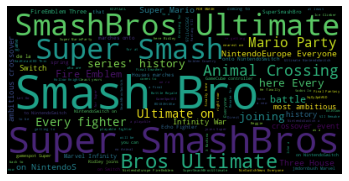

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

STOPWORDS = {'https','co','E32018','Nintendo','NintendoDirect','NintendoE3',
            'NintendoE3RT','RT','E3','in','is','the','t'}
wc = WordCloud(stopwords=STOPWORDS).generate(textstr)

x = plt.figure()
plt.imshow(wc)
plt.axis('off')
display(x)